PCA e LDA: MNIST

1. Carregue uma das bases abaixo, diretamente do `sklearn`
   - MNIST (caracteres manuscritos)
     - `from sklearn.datasets import fetch_openml`
     - `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
2. [PCA (_Principal Component Analysis_)](https://www.youtube.com/watch?v=FgakZw6K1QQ&feature=youtu.be)
   - Aplique PCA avaliando o número de componentes necessários
   - Visualize as imagens associadas com os primeiros componentes: `pca.components_[i].reshape()`
   - Exiba a variância cumulativa
   - Compare as imagens de entrada com as imagens reconstruídas: `pca.transform` e `pca.inverse_transform`
3. [LDA (_Linear Discriminant Analysis_)](https://www.youtube.com/watch?v=azXCzI57Yfc&feature=youtu.be)
   - Aplique LDA nos dados originais
   - Exiba a projeção dos dados nos Discriminantes Lineares
   - Exiba a taxa de variância acumulada
4. Classificador
   - Aplique um classificador de sua escolha nas features obtidas por LDA e PCA
   - Compare os dois métodos e resultados

### 1. Carregue a base MNIST

_This database consists of 70,000 images, each with 784 pixels (i.e., images are 28x28)._

**Carregamento da base de dados**

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784',
                    version=1,
                    return_X_y=True)

**Normalização dos dados**

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std  = scaler.fit_transform(X)

### 2. [PCA]( https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

**Aplique `PCA` avaliando o número de componentes necessários**

In [3]:
from sklearn.decomposition import PCA

# n_components = dimensionality, pixels, to use... please pick a perfect square number (4, 9, 16, ..., 784)
pca = PCA(n_components=9)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
X_pca = pca.transform(X_std)
X_pca

array([[-0.89171987, -4.92972059, -0.09301872, ...,  0.24895555,
         1.47449958, -1.17572637],
       [ 8.81352962, -7.51756215, -3.71419431, ..., -0.13278802,
         3.19037401, -0.23260364],
       [ 2.20483532,  9.82445238, -5.75245736, ..., 18.90358361,
         3.91668955,  2.45896584],
       ...,
       [-5.22259519, -1.18431477, -4.754729  , ..., -5.13180367,
        -1.3462078 ,  0.66123438],
       [-2.17772801, -6.9950264 , -3.22873763, ..., -3.33331918,
         1.77592785,  9.5227766 ],
       [11.77787206, -5.40298821,  2.32274444, ...,  0.44193051,
         3.16037672,  5.04326707]])

**Visualize as imagens associadas com os primeiros componentes**

In [5]:
# Digit plotting function
import matplotlib.pyplot as plt
import numpy as np

def plotter(data):
    pixels    = data.shape[1]
    dimension = int(np.sqrt(pixels))
    shape     = (dimension, dimension)
    
    plt.figure(figsize=(10, 3))
    for i in range(1, 31):  
        plt.subplot(3, 10, i)
        plt.imshow(data[i].reshape(shape), cmap='binary')
        plt.axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

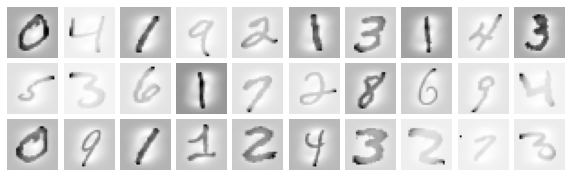

In [6]:
# Plot original images
plotter(data=X_std)

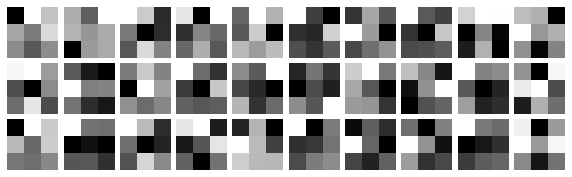

In [7]:
# Plot PCA components
plotter(data=X_pca)

**Exiba a variância cumulativa**

In [8]:
import numpy as np

pca_cumulative_variace = np.cumsum((pca.explained_variance_ratio_))

Text(0, 0.5, 'cumulative explained variance')

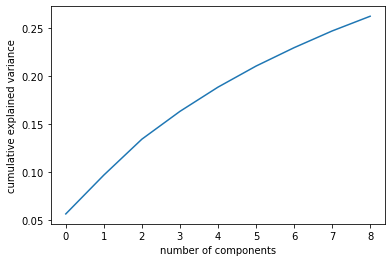

In [9]:
plt.plot(pca_cumulative_variace)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

**Compare as imagens de entrada com as imagens reconstruídas**

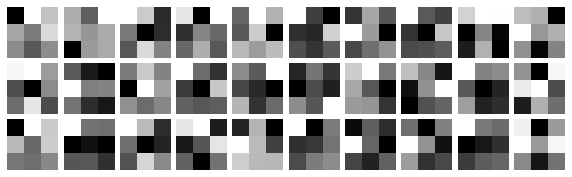

In [10]:
# Plot input images
plotter(data=pca.transform(X_std))

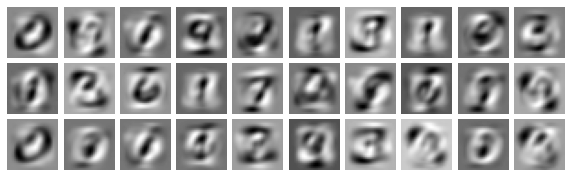

In [11]:
# Plot reconstructed images
plotter(pca.inverse_transform(X_pca))

### 3. [LDA](https://www.apsl.net/blog/2017/07/18/using-linear-discriminant-analysis-lda-data-explore-step-step/)

**Aplique `LDA` nos dados originais**

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# n_features    = 784 (pixels)
# n_classes     = 10 (0, 1, 2, 4, 5, 6, 7, 8, 9)
# n_ components = min(n_features, n_classes - 1) = min(784, 10 - 1) = 9
lda = LDA(n_components=9)
lda.fit(X_std, y)

LinearDiscriminantAnalysis(n_components=9, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [15]:
X_lda = lda.transform(X_std)
X_lda

array([[-0.9815313 , -0.60674231, -1.65255425, ...,  0.73096093,
         1.78688392, -0.96866992],
       [-3.05892432, -3.05284985, -2.88173559, ...,  0.43035835,
        -0.90883765, -0.17645317],
       [ 1.85791007, -0.05752316,  1.11624349, ...,  2.04871221,
         1.71002227,  2.87380323],
       ...,
       [ 3.12523695, -0.84419027,  2.06665897, ..., -0.06651955,
         0.28546004,  0.44446854],
       [-0.92950977,  0.79599839, -1.4049491 , ..., -2.09722096,
         2.56354996,  0.02696681],
       [-3.78310457, -1.7814597 ,  6.61480248, ...,  0.67214626,
        -0.67069241,  0.38933558]])

In [16]:
y_pred_lda = lda.predict(X_std)
y_pred_lda

array(['5', '0', '4', ..., '4', '5', '6'], dtype='<U1')

**Exiba a projeção dos dados nos Discriminantes Lineares**

**Exiba a taxa de variância acumulada**

In [17]:
import numpy as np

lda_cumulative_variace = np.cumsum((lda.explained_variance_ratio_))

Text(0, 0.5, 'cumulative explained variance')

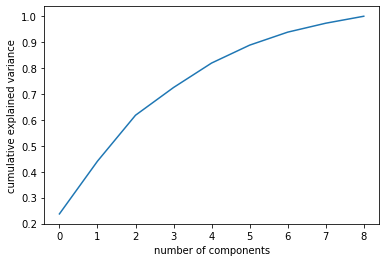

In [18]:
plt.plot(lda_cumulative_variace)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### 4. Classificador

**Crie o classificador**

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000,
                             warm_start=True,
                             verbose=1,
                             random_state=42,
                             n_jobs=-2)

**`PCA`: aplique um classificador de sua escolha nas features obtidas**

In [20]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,
                                                                    y,
                                                                    test_size=0.3,
                                                                    random_state=42,
                                                                    shuffle=True)

In [22]:
# PCA

rfc.fit(X_train_pca, y_train_pca)
y_pred_pca_rfc = rfc.predict(X_test_pca)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
[Parallel(n_jobs=23)]: Using backend ThreadingBackend with 23 concurrent workers.
[Parallel(n_jobs=23)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=23)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=23)]: Done 404 tasks      | elapsed:    0.1s
[Parallel(n_jobs=23)]: Done 754 tasks      | elapsed:    0.3s
[Parallel(n_jobs=23)]: Done 1000 out of 1000 | elapsed:    0.3s finished


**`LDA`: aplique um classificador de sua escolha nas features obtidas**

In [23]:
from sklearn.model_selection import train_test_split

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda,
                                                                    y,
                                                                    test_size=0.3,
                                                                    random_state=42,
                                                                    shuffle=True)

In [25]:
# LDA

rfc.fit(X_train_lda, y_train_lda)
y_pred_lda_rfc = rfc.predict(X_test_lda)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
[Parallel(n_jobs=23)]: Using backend ThreadingBackend with 23 concurrent workers.
[Parallel(n_jobs=23)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=23)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=23)]: Done 404 tasks      | elapsed:    0.1s
[Parallel(n_jobs=23)]: Done 754 tasks      | elapsed:    0.2s
[Parallel(n_jobs=23)]: Done 1000 out of 1000 | elapsed:    0.3s finished


**Compare os dois métodos e resultados**

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [27]:
mae_pca     = mean_absolute_error(y_test_pca, y_pred_pca_rfc)
mse_pca     = mean_squared_error(y_test_pca, y_pred_pca_rfc)
rmse_pca    = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca_rfc))
r_sqrd_pca  = r2_score(y_test_pca, y_pred_pca_rfc)

print(f"PCA Mean Absolute Error   : {mae_pca:.2f}")
print(f"PCA Mean Squared Error    : {mse_pca:.2f}")
print(f"PCA Root Mean Square Error: {rmse_pca:.2f}")
print(f"PCA R-Squared             : {r_sqrd_pca:.2f}")

PCA Mean Absolute Error   : 0.42
PCA Mean Squared Error    : 1.95
PCA Root Mean Square Error: 1.40
PCA R-Squared             : 0.77


In [28]:
cr = classification_report(y_test_pca, y_pred_pca_rfc)
cm = confusion_matrix(y_test_pca, y_pred_pca_rfc)

print (f"PCA Classification Report: \n{cr}")
print (f"PCA Confusion Report: \n{cm}")

PCA Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2058
           1       0.97      0.98      0.97      2364
           2       0.93      0.92      0.92      2133
           3       0.87      0.87      0.87      2176
           4       0.77      0.81      0.79      1936
           5       0.89      0.86      0.87      1915
           6       0.95      0.96      0.96      2088
           7       0.92      0.91      0.92      2248
           8       0.84      0.82      0.83      1992
           9       0.78      0.77      0.77      2090

    accuracy                           0.89     21000
   macro avg       0.89      0.89      0.89     21000
weighted avg       0.89      0.89      0.89     21000

PCA Confusion Report: 
[[1960    1    9    3    3   33   32    2   15    0]
 [   0 2314   10   20    3    1    4    2    7    3]
 [  20    4 1964   45   28    3   17   18   33    1]
 [  14   15   49 1897   17   38

In [29]:
mae_lda     = mean_absolute_error(y_test_lda, y_pred_lda_rfc)
mse_lda     = mean_squared_error(y_test_lda, y_pred_lda_rfc)
rmse_lda    = np.sqrt(mean_squared_error(y_test_lda, y_pred_lda_rfc))
r_sqrd_lda  = r2_score(y_test_lda, y_pred_lda_rfc)

print(f"LDA Mean Absolute Error   : {mae_lda:.2f}")
print(f"LDA Mean Squared Error    : {mse_lda:.2f}")
print(f"LDA Root Mean Square Error: {rmse_lda:.2f}")
print(f"LDA R-Squared             : {r_sqrd_lda:.2f}")

LDA Mean Absolute Error   : 2.92
LDA Mean Squared Error    : 13.09
LDA Root Mean Square Error: 3.62
LDA R-Squared             : -0.57


In [30]:
cr = classification_report(y_test_lda, y_pred_lda_rfc)
cm = confusion_matrix(y_test_lda, y_pred_lda_rfc)

print (f"LDA Classification Report: \n{cr}")
print (f"LDA Confusion Report: \n{cm}")

# Note on warning: https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi

LDA Classification Report: 
              precision    recall  f1-score   support

           0       0.15      0.06      0.09      2058
           1       0.00      0.00      0.00      2364
           2       0.02      0.02      0.02      2133
           3       0.01      0.00      0.00      2176
           4       0.01      0.02      0.01      1936
           5       0.01      0.00      0.00      1915
           6       0.00      0.00      0.00      2088
           7       0.00      0.01      0.00      2248
           8       0.09      0.33      0.14      1992
           9       0.00      0.00      0.00      2090

    accuracy                           0.04     21000
   macro avg       0.03      0.04      0.03     21000
weighted avg       0.03      0.04      0.03     21000

LDA Confusion Report: 
[[ 127    0    1    2  922  470    2   12  470   52]
 [   8    0   31    2  512    1    0 1640  170    0]
 [ 163    1   43  784   47  350    7  152  574   12]
 [   3    0   54    7 1342   56